<a href="https://colab.research.google.com/github/ram-ctrl/Web_Development/blob/project/finaly_year_project(credit_card_fruad_detection)%20different%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))

Python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
Numpy: 1.21.6
Pandas: 1.3.5
Matplotlib: 3.2.2
Seaborn: 0.11.2
Scipy: 1.7.3


In [ ]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("/creditcard.csv")


In [30]:
# Grab a peek at the data
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [31]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [32]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())


(267336, 31)
               Time             V1             V2             V3  \
count  267336.00000  267336.000000  267336.000000  267336.000000   
mean    90085.15133      -0.012892      -0.014209       0.047238   
std     45138.19955       1.959217       1.658912       1.510397   
min         0.00000     -56.407510     -72.715728     -33.680984   
25%     52240.00000      -0.925302      -0.607368      -0.813503   
50%     80483.00000       0.015880       0.059872       0.239541   
75%    133459.00000       1.292526       0.788194       1.063099   
max    162728.00000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  267336.000000  267335.000000  267335.000000  267335.000000   
mean        0.010539      -0.018890       0.008262      -0.008312   
std         1.416393       1.369393       1.325422       1.221688   
min        -5.683171     -42.147898     -26.160506     -43.557242   
25%        -0.846018      -0.

In [33]:
# Print the shape of the data
data = data.sample(frac=0.1, random_state = 1)
print(data.shape)
print(data.describe())


(26734, 31)
                Time            V1            V2            V3            V4  \
count   26734.000000  26734.000000  26734.000000  26734.000000  26734.000000   
mean    89895.209434     -0.018797     -0.016167      0.063574      0.012041   
std     45257.712674      1.967445      1.703796      1.514221      1.407939   
min         0.000000    -41.928738    -63.344698    -30.558697     -5.683171   
25%     51775.250000     -0.927958     -0.608442     -0.794355     -0.846474   
50%     80127.000000     -0.006185      0.055923      0.257088     -0.006901   
75%    133587.750000      1.291822      0.803599      1.089555      0.765169   
max    162723.000000      2.454930     16.697832      3.866661     16.715537   

                 V5            V6            V7            V8            V9  \
count  26734.000000  26734.000000  26734.000000  26734.000000  26734.000000   
mean      -0.019835      0.009510     -0.011133     -0.000796     -0.000799   
std        1.384949      1.320

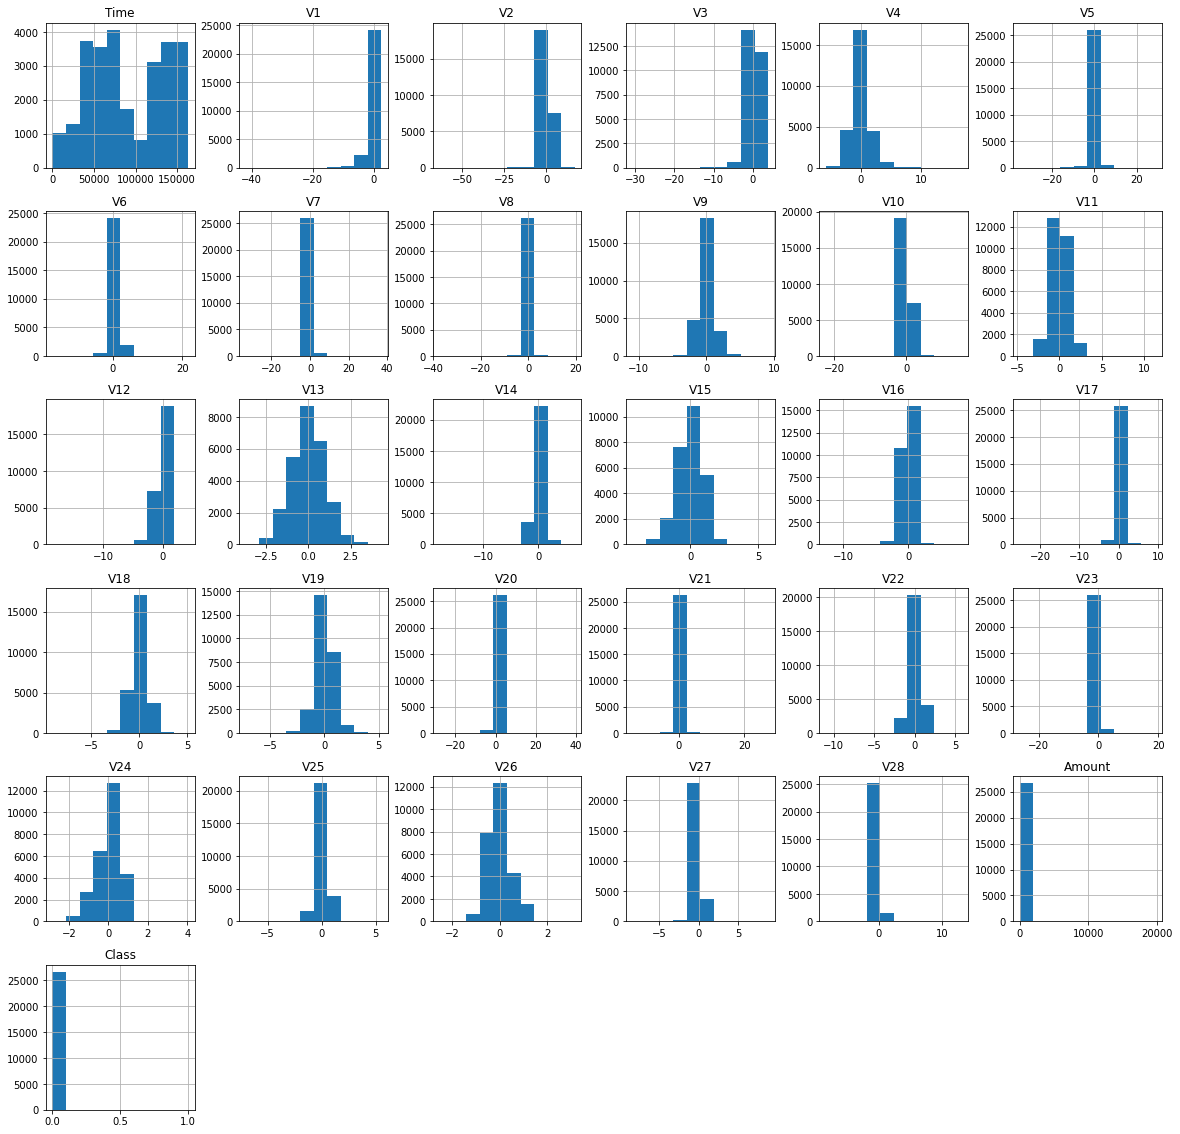

In [34]:
# Plot histograms of each parameter 
data.hist(figsize = (20, 20))
plt.show()


In [35]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0016485575121768454
Fraud Cases: 44
Valid Transactions: 26690


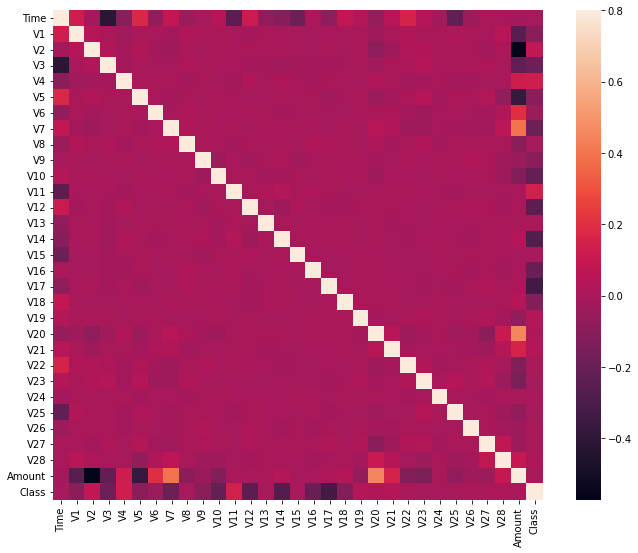

In [36]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [37]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()

# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]
Y = data[target]

# Print shapes
print(X.shape)
print(Y.shape)

(26734, 30)
(26734,)


In [38]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}


In [39]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    # Reshape the prediction values to 0 for valid, 1 for fraud. 
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Isolation Forest: 61
0.9977182613899903
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26690
         1.0       0.31      0.32      0.31        44

    accuracy                           1.00     26734
   macro avg       0.65      0.66      0.66     26734
weighted avg       1.00      1.00      1.00     26734

Local Outlier Factor: 89
0.9966709059624448
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     26690
         1.0       0.00      0.00      0.00        44

    accuracy                           1.00     26734
   macro avg       0.50      0.50      0.50     26734
weighted avg       1.00      1.00      1.00     26734



<Figure size 648x504 with 0 Axes>